# DNA Classification

# Import the Libraries

In [102]:
import sys
from symtable import Class

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import warnings

from PIL.ImagePalette import random
from pandas.core.common import random_state

warnings.filterwarnings('ignore')

# Import data from URL

In [103]:
file_id = '1apfg2mUlyKe4V7fj_-jLtx-A4D2ZDYcX'
import gdown

# شناسه فایل از لینک گوگل درایو
file_id = '1apfg2mUlyKe4V7fj_-jLtx-A4D2ZDYcX'

# ساخت لینک قابل دانلود
download_url = f"https://drive.google.com/uc?id={file_id}"

# دانلود فایل و ذخیره با نام دلخواه
gdown.download(download_url, 'data.csv', quiet=False)

#https://drive.google.com/file/d/1apfg2mUlyKe4V7fj_-jLtx-A4D2ZDYcX/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1apfg2mUlyKe4V7fj_-jLtx-A4D2ZDYcX
To: C:\Users\ABC\PycharmProjects\JupyterProject\data.csv
100%|██████████| 7.13k/7.13k [00:00<00:00, 2.01MB/s]


'data.csv'

In [104]:
names = ["Class", "Id", "Sequence"]
data = pd.read_csv("data.csv", names=names)
data.head()

,Class,Id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [105]:
classes = data.loc[:, "Class"]
classes.head()

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object

## Generate list of sequence

In [106]:
sequences = list(data.loc[:, "Sequence"])
dataset = {}

for i, seq in enumerate(sequences):
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    nucleotides.append(classes[i])
    dataset[i] = nucleotides

print(dataset)

{0: ['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+'], 1: ['t', 'g', 'c', 't', 'a', 't', 'c', 'c', 't', 'g', 'a', 'c', 'a', 'g', 't', 't', 'g', 't', 'c', 'a', 'c', 'g', 'c', 't', 'g', 'a', 't', 't', 'g', 'g', 't', 'g', 't', 'c', 'g', 't', 't', 'a', 'c', 'a', 'a', 't', 'c', 't', 'a', 'a', 'c', 'g', 'c', 'a', 't', 'c', 'g', 'c', 'c', 'a', 'a', '+'], 2: ['g', 't', 'a', 'c', 't', 'a', 'g', 'a', 'g', 'a', 'a', 'c', 't', 'a', 'g', 't', 'g', 'c', 'a', 't', 't', 'a', 'g', 'c', 't', 't', 'a', 't', 't', 't', 't', 't', 't', 't', 'g', 't', 't', 'a', 't', 'c', 'a', 't', 'g', 'c', 't', 'a', 'a', 'c', 'c', 'a', 'c', 'c', 'c', 'g', 'g', 'c', 'g', '+'], 3: ['a', 'a', 't', 't', 'g', 't', 'g', 'a', 't', 'g', 't', 'g', 't', 'a', 't', 'c', 'g', 'a', 'a', 'g', 't', 'g', 

In [107]:
df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [108]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [109]:
df.rename(columns = {57 : "Class"}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [110]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,t,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [111]:
def visualize_target(plot, feature):
  total = len(feature)
  for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
  plt.show()

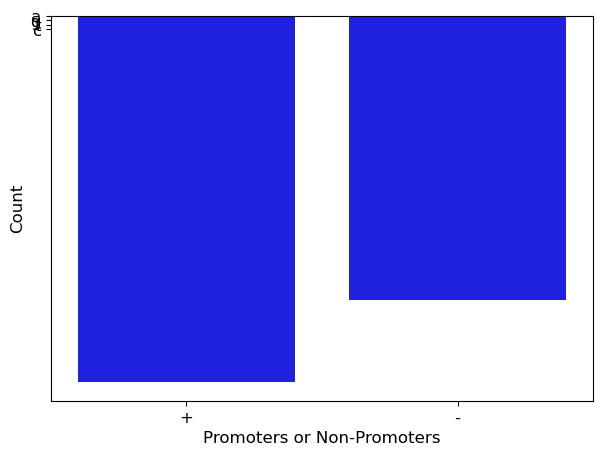

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
ax = sns.countplot(x="Class", data=df, color="b")

plt.xticks(size=12)
plt.xlabel("Promoters or Non-Promoters", size=12)
plt.yticks(size=12)
plt.ylabel("Count", size=12)

plt.savefig("target_hist.png")
plt.show()

In [113]:
series = []
for name in df.columns:
    series.append(df[name].value_counts())

info = pd.DataFrame(series)
details = info.transpose()
details.head()

,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
t,38.0,26.0,27.0,26.0,22.0,24.0,30.0,32.0,32.0,28.0,...,21.0,22.0,23.0,33.0,35.0,30.0,23.0,29.0,34.0,NaN
c,27.0,22.0,21.0,30.0,19.0,18.0,21.0,20.0,22.0,22.0,...,36.0,42.0,31.0,32.0,21.0,32.0,29.0,29.0,17.0,NaN
a,26.0,34.0,30.0,22.0,36.0,42.0,38.0,34.0,33.0,36.0,...,23.0,24.0,28.0,27.0,25.0,22.0,26.0,24.0,27.0,NaN
g,15.0,24.0,28.0,28.0,29.0,22.0,17.0,20.0,19.0,20.0,...,26.0,18.0,24.0,14.0,25.0,22.0,28.0,24.0,28.0,NaN
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0


In [114]:
numerical_df = pd.get_dummies(df)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [115]:
df = numerical_df.drop(columns=['Class_-'])
df.rename(columns={'Class_+': 'Class'}, inplace=True)
df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,True,False,True


# Modeling

In [116]:
from sklearn import model_selection

X = np.array(df.drop(['Class'], axis=1))
y = np.array(df['Class'])

seed = 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_test, y_train, y_test

(array([[ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False,  True],
        [False,  True, False, ..., False, False,  True],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False,  True, ..., False, False, False],
        [False,  True, False, ..., False, False,  True]], shape=(84, 228)),
 array([[False, False, False, ..., False, False,  True],
        [False,  True, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False,  True, False, ...,  True, False, False],
        [False,  True, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False]], shape=(22, 228)),
 array([False,  True,  True,  True, False, False, False, False,  True,
         True,  True, False,  True,  True,  True, False, False, False,
        False,  True, False, False, False,  True,  True, False, False,
        False,  True, False,  True,  Tr

In [117]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

In [118]:
# Define scoring method
scoring = 'accuracy'

# Define the model to train
names = ["Nearest Neighbors", "Gaussian Process", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid", "XGBoost"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid'),

]

models = zip(names, classifiers)

# Evaluate each model in turn
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(classification_report(y_test, predictions))




Nearest Neighbors: 0.779167 (0.133427)
Nearest Neighbors
              precision    recall  f1-score   support

       False       1.00      0.67      0.80        15
        True       0.58      1.00      0.74         7

    accuracy                           0.77        22
   macro avg       0.79      0.83      0.77        22
weighted avg       0.87      0.77      0.78        22

Gaussian Process: 0.868056 (0.104721)
Gaussian Process
              precision    recall  f1-score   support

       False       1.00      0.93      0.97        15
        True       0.88      1.00      0.93         7

    accuracy                           0.95        22
   macro avg       0.94      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22

Decision Tree: 0.770833 (0.120482)
Decision Tree
              precision    recall  f1-score   support

       False       1.00      0.80      0.89        15
        True       0.70      1.00      0.82         7

    accuracy         

In [119]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np

model = XGBClassifier(eval_metric='logloss')

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for train_index, val_index in kfold.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]

    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    score = accuracy_score(y_val, preds)
    scores.append(score)

print("XGBoost Accuracy (manual CV): %.4f (+/- %.4f)" % (np.mean(scores), np.std(scores)))

# نهایی روی X_test
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, preds))


XGBoost Accuracy (manual CV): 0.8708 (+/- 0.0812)

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

       False       1.00      0.93      0.97        15
        True       0.88      1.00      0.93         7

    accuracy                           0.95        22
   macro avg       0.94      0.97      0.95        22
weighted avg       0.96      0.95      0.96        22

